In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from xlwt import Workbook
import math
import timeit
from timeit import default_timer as timer
start=timeit.timeit()
df=pandas.read_excel('Ex3.xlsx', sheet_name='Sheet1', usecols=['Time', 'Loading', 'T Inside'])
z=numpy.size(df['Time'])

In [2]:
I_l1=[]
j=0
class Trans():
    def __init__(self, therm_class, a, b, hot_spot,avg_wnd):
        self.therm_class=therm_class
        self.a=a
        self.b=b
        self.hot_spot=hot_spot
        self.avg_wnd=avg_wnd
    def show(self):
        print("Thermal class:", self.therm_class)
        print("Arrhenius' constant a:", self.a)
        print("Arrhenius' constant b:", self.b)
        print("Rated hotspot winding temperature:", self.hot_spot)
        print("Average winding temperature rise:", self.avg_wnd)

In [3]:
A=Trans(105, 3.10e-14, 15900, 130, 50)
E=Trans(120, 5.48e-15, 17212, 145, 70)
B=Trans(130, 1.72e-15, 18115, 155, 75)
F=Trans(155, 9.60e-17, 20475, 180, 80)
H=Trans(180, 5.350e-18, 22979, 205, 100)
I_200=Trans(200, 5.31e-19, 25086, 225, 130)
I_220=Trans(220, 6.26e-20, 27255, 245, 150)
x=str(input("Enter insulation class (A,B,E,F,H,200 or 220):"))
if (x=='A' or x=='a'):
    x=A
    name='A'
elif (x=='B' or x=='b'):
    x=B
    name='B'
elif (x=='E' or x=='e'):
    x=E
    name='E'
elif (x=='F' or x=='f'):
    x=F
    name='F'
elif (x=='200'):	
    x=I_200
    name='200'
elif (x=='H' or x=='h'):
    x=H
    name='H'
elif (x=='220'):
    x=I_220
    name='220'
else:
    x=0
    print("Wrong insulation class entered!")

Enter insulation class (A,B,E,F,H,200 or 220):h


In [4]:
def lifetime(x, t, temp, amb_t):
    return 180000*t*pow(x.a, -1)*math.exp(-x.b/(temp+273+amb_t))

Q=input("Enter operation type (type 'AN' for 'air-natural' or 'AF' for 'air-forced'):")
if(Q=='AN' or Q=='an'):
    q=1.6
else:
    q=2.0
tau_r=0.5#rated time constant
z=1.25#constant
def delta_theta_u(theta_i, theta_u, tau, t): #hot-spot temperature rise 
    return theta_i+(theta_u-theta_i)*(1-math.exp(-t/tau))
def ageing_rate(x, temp, amb_t):
    return 180000*pow(x.a, -1)*math.exp(-x.b/(temp+273+amb_t))

Enter operation type (type 'AN' for 'air-natural' or 'AF' for 'air-forced'):an


In [17]:
y=numpy.size(df['Loading'])
i=0
I_u=[]
theta_i=[]
theta_u=[]
tau=[]
hot_spot_temp=[]
age_rate=[]
k=[]
amb_t=[]
d_time=1
while y!=i:
    amb_t.append(df.iloc[i]['T Inside'])
    I_l1.append(df.iloc[i]['Loading'])
    if i==0:
        theta_i.append(0)
        theta_u.append(z*x.avg_wnd*pow(I_l1[i], q))
        tau.append('')
        hot_spot_temp.append(theta_u[i])
        age_rate.append(ageing_rate(x, hot_spot_temp[i], amb_t[i]))
        I_u.append(I_l1[i])
        k.append(1)
        i=i+1
    else:
        I_i=I_l1[i-1]
        I_u=I_l1[i]
        if I_u==I_i:
            theta_u.append(theta_u[i-1])
            j=1
            while I_u==I_l1[i-j]:
                j=j+1
            I_i=I_l1[i-j]
            theta_i.append(z*x.avg_wnd*pow(float(I_i), q))
            tau.append(tau_r*((theta_u[i]/theta_r)-(theta_i[i]/theta_r))/(pow(theta_u[i]/theta_r, z)-pow(theta_i[i]/theta_r, z)))
            hot_spot_temp.append(delta_theta_u(theta_i[i], theta_u[i], tau[i], j*d_time))
            age_rate.append(ageing_rate(x, hot_spot_temp[i], amb_t[i]))
            if(i==y-1):
                k.append(1)
            elif(i%2==0):
                k.append(2)
            else:
                k.append(4)
            i=i+1
            continue
        else:

            theta_i.append(z*x.avg_wnd*pow(float(I_i), q))
            theta_u.append(z*x.avg_wnd*pow(float(I_u), q))
            theta_r=z*x.avg_wnd
            tau.append(tau_r*((theta_u[i]/theta_r)-(theta_i[i]/theta_r))/(pow(theta_u[i]/theta_r, z)-pow(theta_i[i]/theta_r, z)))


            t_i=df.iloc[i-1]['Time']
            t_f=df.iloc[i]['Time']
            #d_time=abs(t_f.hour+t_f.minute/60+t_f.second/3600-(t_i.hour+t_i.minute/60+t_i.second/3600))
            
            hot_spot_temp.append(delta_theta_u(theta_i[i], theta_u[i], tau[i], d_time))
            age_rate.append(ageing_rate(x, hot_spot_temp[i], amb_t[i]))
            if(i==y-1):
                k.append(1)
            elif(i%2==0):
                k.append(2)
            else:
                k.append(4)
            i=i+1


In [18]:
#Interface
wb=Workbook()
sheet1=wb.add_sheet('sheet1')
sheet1.write(0, 0, 'Time') 
sheet1.write(0, 1, 'Loading') 
sheet1.write(0, 2, 'Ultimate Hot-Spot temperature rise') 
sheet1.write(0, 3, 'Time constant') 
sheet1.write(0, 4, 'Hot-spot temperature rise')
sheet1.write(0, 5, 'Ageing rate')
sheet1.write(0, 6, 'Life consumption')
sheet1.write(0, 7, 'K')
sheet1.write(0, 8, 'Kxfactor')
sheet1.write(0, 9, 'Maximum permissible load')
j=1
sum=0
for i in range(0, y):
	#print(i, theta_u[i], tau[i], hot_spot_temp[i], age_rate[i])
	sheet1.write(j,0,i)
	sheet1.write(j,1,I_l1[i])
	sheet1.write(j,2,theta_u[i])
	sheet1.write(j,3,tau[i])
	sheet1.write(j,4,hot_spot_temp[i])
	sheet1.write(j,5,age_rate[i])
	sheet1.write(j,6,d_time*age_rate[i])
	sheet1.write(j,7,k[i])
	sheet1.write(j,8,k[i]*d_time*age_rate[i])
	sheet1.write(j,9,pow((x.hot_spot-amb_t[i])/(z*x.avg_wnd),1/q))
	sum=sum+k[i]*age_rate[i]*d_time
	j=j+1

wb.save('ResultsEx3.xls')

In [19]:
results=pandas.read_excel('ResultsEx3.xls', sheet_name='sheet1')
print(results)

    Time  Loading  Ultimate Hot-Spot temperature rise  Time constant  \
0      0    0.700                           70.642633            NaN   
1      1    0.722                           74.228303       0.458467   
2      2    0.788                           85.379176       0.447557   
3      3    0.859                           98.016474       0.432277   
4      4    0.956                          116.316852       0.415788   
5      5    0.957                          116.511586       0.407180   
6      6    0.962                          117.487085       0.406670   
7      7    0.991                          123.204866       0.403819   
8      8    1.029                          130.850267       0.398405   
9      9    1.044                          133.915489       0.394304   
10    10    1.054                          135.973723       0.392418   
11    11    1.080                          141.380014       0.389755   
12    12    1.104                          146.440273       0.38

In [20]:
print("Lifetime consumed:"+str(round(sum*2/6, 8))+" hours")
print("Remained life:"+str(180000-round(sum*2/6, 8))+" hours")

Lifetime consumed:53.89663595 hours
Remained life:179946.10336405 hours


In [21]:
#a load and a temperature influence on trasformer's aging rate
graph=pandas.read_excel('ResultsEx3.xls', sheet_name='sheet1', usecols=['Time', 'Loading', 'Hot-spot temperature rise', 'Ageing rate'])

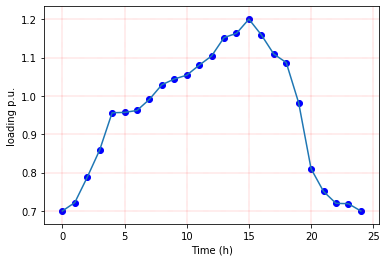

In [22]:
plt.plot(graph['Time'], graph['Loading'])
plt.xlabel('Time (h)')  
plt.ylabel('loading p.u.')
plt.scatter(graph['Time'], graph['Loading'],color="blue")
plt.grid(color='r', linestyle='--', linewidth=0.2)

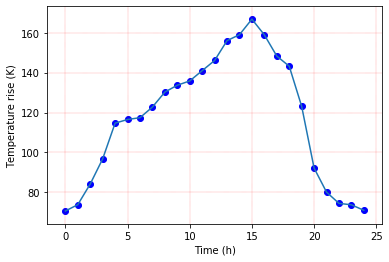

In [23]:
plt.plot(graph['Time'], graph['Hot-spot temperature rise'])
plt.xlabel('Time (h)') 
plt.ylabel('Temperature rise (K)')
plt.scatter(graph['Time'], graph['Hot-spot temperature rise'],color="blue")
plt.grid(color='r', linestyle='--', linewidth=0.2)

Text(0, 0.5, 'Temperature rise (K)')

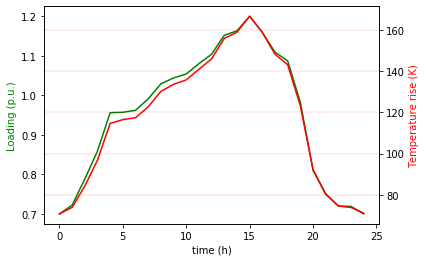

In [24]:
fig, ax1 = plt.subplots()
x1=graph['Time']
y1=graph['Loading']
y2=graph['Hot-spot temperature rise']
ax2 = ax1.twinx()
ax1.plot(x1, y1, 'g-', label="loading")
plt.grid(color='r', linestyle='--', linewidth=0.2)
ax2.plot(x1, y2, 'r-', label="temperature")

ax1.set_xlabel('time (h)')
ax1.set_ylabel('Loading (p.u.)', color='g')
ax2.set_ylabel('Temperature rise (K)', color='r')
#ax1.scatter(x1, y1,color="blue")


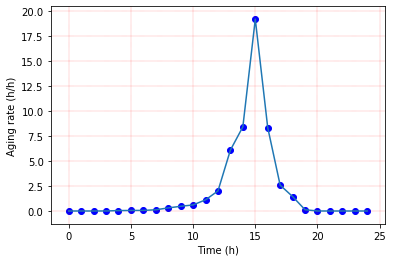

In [25]:
plt.plot(graph['Time'], graph['Ageing rate'])
plt.xlabel('Time (h)') 
plt.ylabel('Aging rate (h/h)')
plt.scatter(graph['Time'], graph['Ageing rate'],color="blue")
plt.grid(color='r', linestyle='--', linewidth=0.2)

In [26]:
#calculation of harmonics
hr=pandas.read_excel('Harmonics.xlsx', sheet_name='Sheet1', usecols=['h','Ih'])
i=0
Ih=[]
size=numpy.size(hr['h'])
h=[]
while size!=i:
    Ih.append(hr.iloc[i]['Ih'])
    h.append(hr.iloc[i]['h'])
    i=i+1
j=0
I=0
while size!=j:
    I=I+pow(Ih[j], 2)
    j=j+1
Ih_I=Ih/pow(I, 1/2)

In [27]:
i=0
sum1=0
sum2=0
while size!=i:
    sum1=sum1+pow(Ih_I[i], 2)*pow(h[i], 2)
    sum2=sum2+pow(Ih_I[i], 2)
    i=i+1
Fhl=sum1/sum2
print("FHL="+str(Fhl))

FHL=4.591728911409384


In [28]:
eddy=0.12
I_max_pu=pow((1+eddy)/(1+Fhl*eddy), 1/2)
print("Imax(pu)="+str(I_max_pu))

Imax(pu)=0.8497713145870109
